## 회귀

회귀(Regression)는 데이터를 통해 관계의 크기(얼마나)를 수량적으로 설명하고 예측하는 방법
- 분류(Classification): 경계선을 그려 **라벨**을 나눔 (고양이/개)
- 회귀(Regression): 추세선을 그려 **숫자**를 예측 (점수/가격/매출)

### 목표
- 회귀가 무엇인지, 왜 필요한지 **직관**으로 이해
- **y = ax + b** (기울기/절편)의 의미 파악
- 분류 vs 회귀 비교

## 회귀의 철학
- 세상에는 '얼마나(How much)'를 묻는 문제도 많음
  - 공부시간 ↑ → 점수는 얼마나 변할까?
  - 광고비 ↑ → 매출은 얼마나 늘까?
  - 온도 ↑ → 아이스크림 판매량은 얼마나 늘까?
- 회귀는 이런 연속값(Continuous)을 예측하는 방법

핵심
> 회귀는 “데이터의 관계를 **수량화**해 **예측**하는 방법”

## 분류 vs 회귀 — 경계선 vs 추세선
- **분류(Classification)**: 범주 라벨(0/1/2…)을 예측 → **경계선(Decision Boundary)**
- **회귀(Regression)**: 연속값을 예측 → **추세선(Trend Line)**

In [2]:
import numpy as np
import plotly.graph_objects as go
np.random.seed(42)

x_class = np.linspace(0, 10, 30)
y_class = (x_class + np.random.randn(30)*2 > 5).astype(int)

x_reg = np.linspace(0, 10, 30)
y_reg = 2.3 * x_reg + 4 + np.random.randn(30)*3

fig = go.Figure()

fig.add_trace(go.Scatter(x=x_class, y=y_class, mode="markers",
                         name="Classification (범주)", marker=dict(color="orange", size=9, opacity=0.8)))
fig.add_trace(go.Scatter(x=[5,5], y=[-0.5,1.5], mode="lines",
                         name="Decision Boundary", line=dict(color="orange", dash="dot")))

# 회귀 산점 + 추세선(진짜 생성식에 준함)
fig.add_trace(go.Scatter(x=x_reg, y=y_reg, mode="markers",
                         name="Regression (연속값)", marker=dict(color="cyan", size=9, opacity=0.8)))
fig.add_trace(go.Scatter(x=x_reg, y=2.3*x_reg + 4, mode="lines",
                         name="Trend Line", line=dict(color="cyan", width=3)))

fig.update_layout(title="Classification vs Regression — 경계선 vs 추세선",
                  xaxis_title="X", yaxis_title="Y", template="plotly_dark",
                  legend_title="개념 비교")
fig.show()

##  직선의 언어: y = ax + b
- **a (slope, 기울기)**: X가 1 증가할 때 Y의 평균 변화량 (변화율)
- **b (intercept, 절편)**: X=0일 때의 Y 값 (출발점)

예: y = 2.5x + 5
- “X가 1 늘면 Y는 **2.5** 증가”
- “X=0일 때 Y는 **5**.”

In [1]:
import numpy as np
import plotly.graph_objects as go

x = np.linspace(0, 10, 200)
fig = go.Figure()

for slope, intercept, color in [(0.5, 2, "gray"), (2.0, 1.0, "cyan"), (4.0, 0.0, "magenta")]:
    y = slope * x + intercept
    fig.add_trace(go.Scatter(x=x, y=y, mode="lines",
                             name=f"Slope={slope}, Intercept={intercept}",
                             line=dict(color=color, width=3)))
fig.update_layout(title="기울기(slope)와 절편(intercept)의 의미",
                  xaxis_title="X", yaxis_title="Y", template="plotly_dark")
fig.show()

## 왜 '직선'?
- 직선은 가장 **단순**하고 **해석이 쉬움**
- 계산이 **빠르고 안정적**
- **비선형**(곡선)도, 변수를 변환해(Polynomial 등) **선형 모델로 표현** 가능
- 대부분의 ML은 선형 모델의 아이디어에서 확장 (규제, 경사하강법, 로지스틱 등)

# 잔차(Residual)와 Loss 개념
회귀선이 데이터를 “잘 맞춘다”는 말의 수학적 의미를 잔차와 Loss로 정의
- 잔차 Residual = 실제값 − 예측값
- Loss = 잔차 제곱합(RSS)
- RSS를 가장 작게 만드는 β₀·β₁ 조합 → 최적 직선(OLS)

## 직선이 데이터를 잘 맞춘다는 뜻
> 예측값 ŷ과 실제값 y 차이가 작을수록 모델 적합도가 높음

In [4]:
import numpy as np, plotly.graph_objects as go

np.random.seed(42)
x = np.linspace(0, 10, 10)
y = 2.3 * x + 4 + np.random.randn(10) * 3
y_pred = 2.3 * x + 4

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode="markers",
                         name="실제 데이터", marker=dict(color="cyan", size=10)))
fig.add_trace(go.Scatter(x=x, y=y_pred, mode="lines",
                         name="예측선", line=dict(color="yellow", width=3)))

for xi, yi, ypi in zip(x, y, y_pred):
    fig.add_trace(go.Scatter(x=[xi, xi], y=[yi, ypi],
                             mode="lines", line=dict(color="magenta", dash="dot"),
                             showlegend=False))
fig.update_layout(title="잔차(Residual) 시각화 — 각 점에서 직선까지의 거리",
                  xaxis_title="X", yaxis_title="Y", template="plotly_dark")
fig.show()

## Loss(손실) 개념 — 왜 제곱?
- 부호 제거 (+/− 상쇄 방지)
- 큰 오차에 큰 벌점 부여
- 미분 가능 → 최적화 용이

## RSS Surface 시각화 — "가장 작은 오차의 직선"
β₀·β₁을 변화시키며 RSS(잔차 제곱합) 크기 시각화

In [2]:
x = np.linspace(0, 10, 20)
y = 2.3*x + 4 + np.random.randn(20)*3

def rss(b0, b1):
    y_pred = b0 + b1*x
    return np.sum((y - y_pred)**2)

b0_range, b1_range = np.linspace(0,8,50), np.linspace(0,4,50)
B0, B1 = np.meshgrid(b0_range, b1_range)
RSS = np.array([[rss(b0, b1) for b0 in b0_range] for b1 in b1_range])

fig = go.Figure(data=[go.Surface(z=RSS, x=b0_range, y=b1_range, colorscale="Viridis")])
fig.update_layout(title="RSS Surface — β₀·β₁ 조합별 손실",
                  scene=dict(xaxis_title="β₀", yaxis_title="β₁", zaxis_title="RSS"),
                  template="plotly_dark")
fig.show()

## 최소제곱법(OLS)의 철학
> "가장 좋은 직선" = 모든 데이터의 잔차 제곱합(RSS)을 가장 작게 만드는 직선

OLS는 모든 점의 오차를 가장 공평하게 분산시키는 직선을 찾는 방법.

## 요약
- 잔차 = 실제 − 예측 → 오차의 단위
- Loss = 잔차 제곱합(RSS)
- 최적 직선 = RSS 최소 (OLS)

## **OLS의 철학 — “가장 공평한 직선”**

|**용어**|**의미**|
|---|---|
|**Ordinary**|특별한 가정 없이 가장 단순한 방법|
|**Least Squares**|잔차의 제곱합을 최소화하는 원리|


### 핵심

> “OLS는 모든 데이터 포인트의 오차를 **가장 공평하게 분산시키는 직선**을 찾는 방법”

## **β₀·β₁의 변화에 따른 회귀선 변화**

> β₀은 선의 ‘위치’, β₁은 선의 ‘기울기’를 결정한다.

In [6]:
import numpy as np, plotly.graph_objects as go
x = np.linspace(0, 10, 100)
fig = go.Figure()
for b1, b0, c in [(1.5, 2, "cyan"), (2.3, 4, "yellow"), (3.5, 1, "magenta")]:
    fig.add_trace(go.Scatter(x=x, y=b1*x+b0, mode="lines", name=f"β₁={b1}, β₀={b0}", line=dict(width=3, color=c)))
fig.update_layout(title="β₀, β₁에 따른 회귀선 변화", xaxis_title="X", yaxis_title="Y", template="plotly_dark")
fig.show()

## **RSS를 β₀·β₁의 함수로 보기**

> β₀(절편)과 β₁(기울기)에 따라 RSS가 어떻게 달라지는지 직접 시각화해서 확인

In [8]:
import numpy as np, plotly.graph_objects as go
np.random.seed(42)
x = np.linspace(0, 10, 20)
y = 2.3*x + 4 + np.random.randn(20)*3

def rss(b0, b1):
    y_pred = b0 + b1*x
    return np.sum((y - y_pred)**2)

b0_range = np.linspace(0, 8, 50)
b1_range = np.linspace(0, 4, 50)
B0, B1 = np.meshgrid(b0_range, b1_range)
RSS = np.array([[rss(b0, b1) for b0 in b0_range] for b1 in b1_range])

fig = go.Figure(data=[go.Surface(z=RSS, x=b0_range, y=b1_range, colorscale="Viridis")])
fig.update_layout(
    title="RSS Surface — β₀·β₁ 조합별 손실(Loss)",
    scene=dict(xaxis_title="β₀ (Intercept)", yaxis_title="β₁ (Slope)", zaxis_title="RSS"),
    template="plotly_dark")
fig.show()

## **RSS 최소점(최적 β) 탐색 — Contour 시각화**

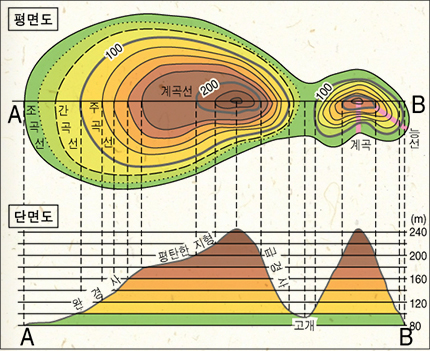

In [9]:
import numpy as np
import plotly.graph_objects as go

Z = np.log1p(RSS)

min_idx = np.unravel_index(np.argmin(Z), Z.shape)
b0_star = b0_range[min_idx[1]]
b1_star = b1_range[min_idx[0]]
z_star  = Z[min_idx]

fig = go.Figure()

fig.add_trace(go.Heatmap(
    z=Z,
    x=b0_range,
    y=b1_range,
    colorscale="Viridis",
    colorbar=dict(title="log(1 + RSS)"),
    hovertemplate=(
        "β₀ (Intercept) = %{x:.3f}<br>"
        "β₁ (Slope) = %{y:.3f}<br>"
        "log(1+RSS) = %{z:.3f}<extra></extra>"
    )
))

fig.add_trace(go.Contour(
    z=Z,
    x=b0_range,
    y=b1_range,
    showscale=False,
    contours=dict(
        coloring="none", showlabels=False, start=Z.min(),
        end=Z.max(), size=(Z.max()-Z.min())/12
    ),
    line=dict(color="rgba(255,255,255,0.35)", width=1)
))

fig.add_trace(go.Scatter(
    x=[b0_star], y=[b1_star],
    mode="markers+text",
    marker=dict(symbol="star", size=18, color="yellow", line=dict(color="black", width=1)),
    text=[f"  최소점 β₀={b0_star:.2f}, β₁={b1_star:.2f}"],
    textfont=dict(color="white"),
    name="RSS Minimum",
))

fig.update_layout(
    title="RSS Contour Map — β₀·β₁ 조합별 Loss (어두울수록 작음)",
    template="plotly_dark",
    xaxis_title="β₀ (Intercept)",
    yaxis_title="β₁ (Slope)",
    annotations=[
        dict(
            x=b0_star, y=b1_star, text="★ 최소 손실점 (RSS 최소)",
            showarrow=True, arrowhead=2, ax=60, ay=-60,
            bgcolor="rgba(255,255,0,0.2)", font=dict(color="white")
        )
    ],
    margin=dict(l=60, r=40, t=70, b=50)
)

fig.show()

print(f"RSS 최소점: β₀*={b0_star:.4f}, β₁*={b1_star:.4f}, log(1+RSS)={z_star:.4f}")

RSS 최소점: β₀*=3.4286, β₁*=2.2041, log(1+RSS)=5.2356


| **구성 요소**     | **의미**        | **해석**                             |
| ------------- | ------------- | ---------------------------------- |
| **가로축 (β₀)**  | 절편(Intercept) | 직선의 위치를 위아래로 이동                    |
| **세로축 (β₁)**  | 기울기(Slope)    | 직선의 기울기를 바꿔 데이터에 맞춤                |
| **색상(Color)** | RSS(손실 크기)    | 어두울수록 작음 → 모델이 잘 맞는 구간             |
| **별표 마커(★)**  | RSS 최소점       | 가장 작은 Loss → 최적의 β₀, β₁ 조합 (OLS 해) |


## **Gradient(기울기)와 OLS*

> “이 골짜기(최소점)를 향해 β를 조금씩 이동시키는 과정이 바로 **경사하강법(Gradient Descent)**”

## 요약
- OLS = RSS를 최소화하는 β₀·β₁ 찾기
- RSS Surface는 Convex 형태 → 항상 하나의 최소점 존재
- 최적 β는 RSS 최소점 (Loss Minimum)
- Gradient Descent = Loss Surface 내리막길 이동 과정

## 정리
- OLS는 이 골짜기 바닥 좌표를 계산하는 방법
- Gradient Descent는 그 방향으로 걸어 내려가는 방법

# 데이터 전처리 실습(예시)
- 예시임. 정말 그냥 예시

## 1. 결측치


## 예시

| **방법** | **설명**          | **sklearn 예시**                          |
| ------ | --------------- | --------------------------------------- |
| 평균 대체  | 수치형 컬럼의 평균으로 채움 | SimpleImputer(strategy='mean')          |
| 중앙값 대체 | 극단값이 있을 때 안정적   | SimpleImputer(strategy='median')        |
| 최빈값 대체 | 범주형 데이터에 사용     | SimpleImputer(strategy='most_frequent') |


## 분포에 따라서 판단하셔야 함.

In [16]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

df = pd.DataFrame({
    "Age": [25, 32, np.nan, 40, np.nan],
    "Income": [50000, 60000, 55000, np.nan, 52000]
})

print("원본 데이터 (결측치 포함):")
display(df)

imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("결측치 평균 대체 결과:")
display(df_imputed)

원본 데이터 (결측치 포함):


,Age,Income
0,25.0,50000.0
1,32.0,60000.0
2,NaN,55000.0
3,40.0,NaN
4,NaN,52000.0


결측치 평균 대체 결과:


,Age,Income
0,25.000000,50000.0
1,32.000000,60000.0
2,32.333333,55000.0
3,40.000000,54250.0
4,32.333333,52000.0


## 결측치 처리
- 평균 대체는 간단하지만, 데이터의 분포가 한쪽으로 치우쳐 있다면 중앙값이 더 나을 수도 있음.
- 즉, 전처리의 선택은 데이터의 ‘모양(분포)’에 따라 달라야 함

### 2. 이상치(Outliers)
- IQR (Interquartile Range)
- Boxplot으로 시각화해 확인

In [17]:
import numpy as np
import pandas as pd
import plotly.express as px

np.random.seed(42)
data = np.random.normal(50, 10, 100)
data = np.append(data, [120, 130])

df_box = pd.DataFrame({"value": data})

fig = px.box(
    df_box,
    y="value",
    title="이상치 탐지 (Boxplot)",
    template="plotly_dark"
)
fig.show()

## 이상치 전략
- 이상치 제거 (drop)
- 로그/루트 변환 (np.log, np.sqrt)
- 대체값 삽입 (중앙값, IQR 평균 등)

## 3. 인코딩(Encoding)

| **방법**               | **설명**         | **예시**                  |
| -------------------- | -------------- | ----------------------- |
| **One-Hot Encoding** | 독립적 범주 (순서 없음) | 성별(M/F) → [1,0], [0,1]  |
| **Ordinal Encoding** | 순서 있는 변수       | 교육수준(고졸<대졸<대학원) → 1,2,3 |

In [18]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

df_gender = pd.DataFrame({"gender": ["M", "F", "M", "F"]})
print("원본 데이터:")
display(df_gender)

encoder = OneHotEncoder(sparse_output=False)

encoded = encoder.fit_transform(df_gender[["gender"]])

df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
print("인코딩 결과:")
display(df_encoded)

원본 데이터:


,gender
0,M
1,F
2,M
3,F


인코딩 결과:


,gender_F,gender_M
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0


### 4. 스케일링(Scaling)
- 단위 맞추기
    - 특정 변수가 단위가 크면, 이 특정변수를 더 중요하게 생각합니다.

| **방법**             | **설명**        | **공식**                         | **sklearn 예시**   |
| ------------------ | ------------- | ------------------------------ | ---------------- |
| **StandardScaler** | 평균=0, 표준편차=1  | z = \frac{x - \mu}{\sigma}     | StandardScaler() |
| **MinMaxScaler**   | [0,1] 구간으로 맞춤 | x’ = \frac{x - min}{max - min} | MinMaxScaler()   |

In [19]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

df_imputed = pd.DataFrame({
    "Age": [25.0, 32.0, 32.33, 40.0, 32.33],
    "Income": [50000.0, 60000.0, 55000.0, 54250.0, 52000.0]
})
print("원본 데이터:")
display(df_imputed)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed)

df_scaled = pd.DataFrame(scaled_data, columns=df_imputed.columns)
print("표준화된 데이터 (Standard Scaled):")
display(df_scaled)

원본 데이터:


,Age,Income
0,25.00,50000.0
1,32.00,60000.0
2,32.33,55000.0
3,40.00,54250.0
4,32.33,52000.0


표준화된 데이터 (Standard Scaled):


,Age,Income
0,-1.544578,-1.261511
1,-0.069940,1.706750
2,-0.000421,0.222620
3,1.615360,0.000000
4,-0.000421,-0.667859


## 5. Pipeline - 전처리 자동화

## 전처리 계속 합니다. 계속 계속 훈련하고 검증 배포 이건 계속 반복하면서 전처리도 반복
- 하나의 프로세스로 진행할 수 있음.

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

df_train = pd.DataFrame({
    "age": [25, 32, 40, np.nan, 30],
    "income": [50000, 60000, np.nan, 52000, 58000],
    "gender": ["M", "F", "M", "F", "F"],
    "sales": [200, 250, 300, 220, 260]
})

X_train = df_train[["age", "income", "gender"]]
y_train = df_train["sales"]

numeric_features = ["age", "income"]
categorical_features = ["gender"]

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)

intercept = model.named_steps["regressor"].intercept_
coefficients = model.named_steps["regressor"].coef_

print(f"Intercept (절편): {intercept:.3f}")
print(f"Coefficients (회귀계수): {coefficients}")

Intercept (절편): 248.128
Coefficients (회귀계수): [ 22.92606462  18.18105033 -10.63894546  10.63894546]


### 귀찮으면 파이프라인 쓰셈

## 전처리!!!!!
> **Garbage In → Garbage Out**

# 다중회귀(Multiple Regression): β계수의 의미와 해석 실습

### 목표
- 다중회귀가 하나의 결과를 여러 독립변수로 설명하는 모델
- 회귀계수 설명
- 변수 간 상관관계, 다중공선성 문제 탐색 및 해결

## 다중회귀의 개념 — 여러 변수가 한 결과에 영향 줌

---
| 기호 | 의미 |
|------|------|
| β₀ | 절편 (Intercept) |
| β₁, β₂ … | 각 변수의 기울기 (Coefficient) |
| ε | 오차항 (Residual) |

**예시**

| X₁ | X₂ | X₃ | Y |
|----|----|----|---|
| TV 광고 | 라디오 광고 | 신문 광고 | 매출 |

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url)
df.drop("Unnamed: 0", axis=1, inplace=True)
display(df.head())

X = df[["TV", "radio", "newspaper"]]
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
display(coef_df)
print(f"Intercept (β₀): {model.intercept_:.3f}")

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


,Feature,Coefficient
0,TV,0.044730
1,radio,0.189195
2,newspaper,0.002761


Intercept (β₀): 2.979


## β계수의 의미 — 각 변수의 영향력 해석

---

| Feature | Coefficient | 해석 |
|----------|-------------|------|
| TV | 0.045 | TV 광고비 1 증가 → 매출 0.045 증가 (다른 변수 고정 시) |
| Radio | 0.188 | 라디오 광고비 1 증가 → 매출 0.188 증가 |
| Newspaper | -0.001 | 신문 광고는 영향 미미 혹은 음(-)의 효과 |
| Intercept | ≈ 2.9 | 광고비가 0일 때 기본 매출 약 2.9 |



### 핵심
> “β계수는 ‘영향력의 방향과 크기’를 알려준다.”
> - β > 0 → 양의 영향
> - β < 0 → 음의 영향
> - |β| 클수록 영향력 ↑

## 다중공선성(Multicollinearity)
---

진단 방법
- 상관행렬(Correlation Matrix)
- VIF (Variance Inflation Factor): 분산 팽창 계수: 귀분석에서 독립 변수들 간의 다중공선성 문제를 진단하는 지표

In [26]:
import plotly.express as px

corr_matrix = df.corr().round(3)

fig_corr = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    title="Correlation Matrix (Plotly)",
    template="plotly_dark"
)
fig_corr.update_layout(
    xaxis_title="Features",
    yaxis_title="Features",
    width=600, height=500
)
fig_corr.show()




In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

fig_vif = px.bar(
    vif_data.sort_values("VIF", ascending=True),
    x="VIF",
    y="Feature",
    orientation="h",
    title="Variance Inflation Factor (VIF) — 다중공선성 진단",
    template="plotly_dark",
    color="VIF",
    color_continuous_scale="Viridis"
)
fig_vif.add_vline(x=5, line_dash="dash", line_color="orange",
                  annotation_text="주의 경계선 (VIF=5)")
fig_vif.add_vline(x=10, line_dash="dot", line_color="red",
                  annotation_text="심각 (VIF=10)")
fig_vif.show()

**VIF 기준**

| VIF 값 | 해석 |
|--------|------|
| < 5 | 양호 |
| 5~10 | 주의 필요 |
| > 10 | 심한 다중공선성 (변수 제거 고려) |

## 회귀계수 시각화 — 변수 영향력 비교

In [24]:
import plotly.express as px

coef_df_sorted = coef_df.sort_values("Coefficient", ascending=True)
fig = px.bar(
    coef_df_sorted,
    x="Coefficient",
    y="Feature",
    orientation="h",
    title="Feature Importance (β Coefficients)",
    template="plotly_dark"
)
fig.show()

### 정리
> β값을 시각화하면 “어떤 요인이 가장 큰 영향력을 가지는가”를 직관적으로 확인 가능
> TV, Radio가 주요 요인이고 Newspaper는 거의 영향 없음 → 실제 광고 전략에도 반영 가능

### 요약
- 다중회귀 = 여러 변수의 결합으로 Y를 설명하는 모델
- β계수: 각 X의 단위 변화가 Y에 미치는 평균적 영향
- 다중공선성(VIF) → 변수 간 중복성 진단
- 시각화로 변수 중요도 비교 가능
- 회귀계수 해석은 ‘AI의 설명력(Explainability)’의 출발점

# 모델 평가 + 잔차 분석

### 학습 목표
- 수치 평가: R², MAE, MSE, RMSE를 계산하고 해석
- 시각 평가: 예측 vs 실제, 잔차 산점도, 잔차 분포, QQ-Plot을 해석
- 진단/의사결정: 과적합 신호(잔차 패턴, 편향된 오차)를 발견하고 개선 방향을 제시
- 통합 판단: 수치 + 잔차 시각화로 적합도(정확성)와 안정성(일관성)을 함께 판단

## Advertising 데이터 + 기준 모델 학습

In [31]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url).drop(columns=["Unnamed: 0"])

X = df[["TV", "radio", "newspaper"]]
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = make_pipeline(StandardScaler(), LinearRegression())

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"[INFO] Train size: {X_train.shape}, Test size: {X_test.shape}")
print(f"[INFO] First 3 predictions: {np.round(y_pred[:3], 3)}")

[INFO] Train size: (160, 3), Test size: (40, 3)
[INFO] First 3 predictions: [16.408 20.89  21.554]


## 모델 평가 지표 개요
- R²: “모델이 데이터를 얼마나 설명했나?”(0~1, 클수록 좋음)
- MAE: “평균적으로 얼마나 틀렸나?”
- MSE/RMSE: “큰 오차(Outlier)가 있는가?”

| **지표**        | **의미**                 | **해석 포인트**               |
| ------------- | ---------------------- | ------------------------ |
| **R² (결정계수)** | 모델이 데이터의 변동을 얼마나 설명했는가 | 0~1, 1에 가까울수록 좋음         |
| **MAE**       | 평균적으로 몇 단위 틀렸는가        | 절댓값 기준, 이상치 영향 적음        |
| **MSE**       | 오차의 제곱 평균              | 큰 오차에 민감                 |
| **RMSE**      | MSE의 제곱근               | 오차를 원래 단위로 환산, 직관적 비교 가능 |

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² (결정계수): {r2:.3f}")
print(f"MAE (평균 절대 오차): {mae:.3f}")
print(f"MSE (평균 제곱 오차): {mse:.3f}")
print(f"RMSE (제곱근 평균 제곱 오차): {rmse:.3f}")

R² (결정계수): 0.899
MAE (평균 절대 오차): 1.461
MSE (평균 제곱 오차): 3.174
RMSE (제곱근 평균 제곱 오차): 1.782


## 2) 예측 vs 실제 시각화 (적합도 직관)
- 대각선(완벽 일치선)에 가까울수록 모델이 잘 맞는다
- 산처럼 흩어져 있거나 일관된 편향이 보이면 모델 점검 필요

In [33]:
import plotly.express as px
import pandas as pd

df_pred = pd.DataFrame({
    "실제값(y_test)": y_test,
    "예측값(y_pred)": y_pred
})

fig = px.scatter(
    df_pred,
    x="실제값(y_test)",
    y="예측값(y_pred)",
    title="실제값 vs 예측값 (회귀 모델 적합도)",
    template="plotly_dark"
)

fig.add_shape(
    type="line",
    x0=y_test.min(), y0=y_test.min(),
    x1=y_test.max(), y1=y_test.max(),
    line=dict(color="cyan", dash="dash")
)

fig.update_layout(
    xaxis_title="실제값 (y_test)",
    yaxis_title="예측값 (y_pred)",
    legend_title_text="",
)

fig.show()

### 잔차 분석 (Residual Analysis)
- 잔차: 실제값 - 예측값
- 핵심 질문: “오차가 특정 패턴을 보이나?”
- 패턴 없이 0 근처에 고르게 흩어져 있으면 → 적합
- 곡선 패턴 → 비선형 신호(다항/상호작용 필요)
- 예측값이 커질수록 오차 분산이 커짐 → 이분산성 (로그변환/스케일링/가중회귀 고려)

### 잔차 산점도

In [34]:
import plotly.express as px

residuals = (y_test - y_pred).values

fig = px.scatter(
    x=y_pred,
    y=residuals,
    title="잔차 산점도 (Residual Plot)",
    labels={"x": "예측값(ŷ)", "y": "잔차(residual)"},
    template="plotly_dark"
)

fig.add_hline(y=0, line_dash="dash", line_color="orange")

fig.update_layout(
    xaxis_title="예측값 (ŷ)",
    yaxis_title="잔차 (Residual)",
    showlegend=False
)

fig.show()

### 잔차 분포 확인 (정규성/편향성 힌트)
- 중심이 0 근처인 종 모양이면 이상적(정규성 가정)
- 한쪽 꼬리가 길면 편향 또는 이상치 존재 가능

### QQ-Plot (정규성 시각화)

잔차가 대각선에 가깝게 분포하면 정규성 가정을 대체로 만족.
양/음의 꼬리에서 크게 벗어나면 heavy tail(이상치 다수) 가능성.

In [36]:
import numpy as np
import plotly.graph_objects as go
import scipy.stats as stats

residuals_sorted = np.sort(residuals)
n = len(residuals_sorted)

theoretical_q = stats.norm.ppf(np.linspace(0.01, 0.99, n))

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=theoretical_q,
    y=residuals_sorted,
    mode="markers",
    marker=dict(size=6, color='deepskyblue', opacity=0.8),
    name="잔차 분위수 (Sample Quantiles)",
    hovertemplate="이론적 분위수: %{x:.3f}<br>잔차 분위수: %{y:.3f}<extra></extra>"
))

fig.add_trace(go.Scatter(
    x=[theoretical_q.min(), theoretical_q.max()],
    y=[theoretical_q.min(), theoretical_q.max()],
    mode="lines",
    line=dict(color="orange", dash="dash"),
    name="정규분포 기준선 (y = x)"
))

fig.update_layout(
    title="QQ-Plot (잔차의 정규성 검토)",
    xaxis_title="이론적 분위수 (Theoretical Quantiles)",
    yaxis_title="표본 분위수 (Sample Quantiles)",
    template="plotly_dark",
    width=700,
    height=500,
    legend=dict(bgcolor="rgba(0,0,0,0)", x=0.02, y=0.98)
)

fig.show()

## 수치(R²/MAE/RMSE) + 잔차(Residual)의 통합 해석

| **지표/그림**   | **해석 질문**               | **기준**                        |
| ----------- | ----------------------- |-------------------------------|
| **R²**      | “모델이 데이터 변동을 얼마나 설명?”   | 0.7↑ 대체로 양호(도메인 의존)           |
| **MAE**     | “평균적으로 몇 단위 틀림?”        | 0에 가까울수록 좋음                   |
| **RMSE**    | “큰 오차에 민감. Outlier 영향?” | MAE보다 크며, 둘의 차이가 너무 크면 outlier 의심 |
| **잔차 산점도**  | “패턴 있음?”                | 곡선/부채꼴(이분산) → 개선 필요           |
| **잔차 분포**   | “편향/비대칭?”               | 한쪽 꼬리 길면 편향/이상치               |
| **QQ-Plot** | “정규성?”                  | 대각선 부근이면 OK                   |


### 실전 팁
- 곡선 패턴이 보이면: PolynomialFeatures, 비선형 모델 시도
- 이분산 의심: 로그 변환, 스케일링, 가중회귀(Weighted LS) 고려
- 이상치: 로버스트 회귀(Huber/RANSAC), 이상치 처리(삭제/대체)
- 다중공선성: Ridge/Lasso로 안정화

# 과적합과 규제 (Ridge / Lasso)


## 목표
- 과적합의 원인 결과 이해
- 규제의 원리(L1, L2)가 회귀계수에 미치는 영향
- Ridge/Lasso를 적용해 모델의 복잡도 조절 및 교차검증 활용
- 과적합 방지 전략(규제, 교차검증, Feature Selection)

## 과적합(Overfitting)

In [38]:
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = np.linspace(0, 10, 20).reshape(-1, 1)
y = 2 * X.squeeze() + np.random.randn(20) * 2

degrees = [1, 3, 9]
colors = ["cyan", "orange", "magenta"]
labels = ["Underfit (Degree 1)", "Good Fit (Degree 3)", "Overfit (Degree 9)"]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=X.squeeze(), y=y,
    mode="markers",
    marker=dict(size=8, color="white", line=dict(width=1, color="black")),
    name="Data (실제값)"
))

for d, color, label in zip(degrees, colors, labels):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)

    sort_idx = np.argsort(X.squeeze())
    fig.add_trace(go.Scatter(
        x=X.squeeze()[sort_idx],
        y=y_pred[sort_idx],
        mode="lines",
        line=dict(color=color, width=3),
        name=label
    ))

fig.update_layout(
    title="Underfit (1) vs Good Fit (3) vs Overfit (9)",
    xaxis_title="X",
    yaxis_title="Y",
    template="plotly_dark",
    legend=dict(bgcolor="rgba(0,0,0,0)", x=0.02, y=0.98),
    width=800, height=500
)

fig.show()

| 모델 | 특징 | 상태 |
|------|------|------|
| Degree 1 | 단순 직선 | Underfitting (편향↑) |
| Degree 3 | 적절한 복잡도 | Good Fit |
| Degree 9 | 지나치게 복잡 | Overfitting (분산↑) |

## 규제(Regularization)의 개념

> 규제는 모델이 너무 복잡해지는 걸 막기 위해
> 회귀계수(β)의 크기에 **벌점(penalty)** 을 주는 방법

- Ridge → 모난 돌을 둥글게 깎는다
- Lasso → 필요 없는 돌은 아예 버린다

## 규제 실습 — Ridge vs Lasso (Advertising Dataset)

In [40]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url).drop(columns=["Unnamed: 0"])
X = df[["TV", "radio", "newspaper"]]
y = df["sales"]

alphas = np.logspace(-3, 3, 30)
ridge_scores, lasso_scores = [], []

for a in alphas:
    ridge = make_pipeline(StandardScaler(), Ridge(alpha=a))
    lasso = make_pipeline(StandardScaler(), Lasso(alpha=a, max_iter=10000))
    ridge_scores.append(cross_val_score(ridge, X, y, cv=5).mean())
    lasso_scores.append(cross_val_score(lasso, X, y, cv=5).mean())

cv_df = pd.DataFrame({"alpha": alphas, "Ridge": ridge_scores, "Lasso": lasso_scores})
cv_df.head()


import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=cv_df["alpha"], y=cv_df["Ridge"], mode="lines+markers", name="Ridge"))
fig.add_trace(go.Scatter(x=cv_df["alpha"], y=cv_df["Lasso"], mode="lines+markers", name="Lasso"))

fig.update_layout(
    title="Ridge vs Lasso — 규제 강도(α)에 따른 교차검증 성능",
    xaxis_type="log",
    xaxis_title="α (규제 강도, 로그 스케일)",
    yaxis_title="CV Accuracy (평균 교차검증 정확도)",
    template="plotly_dark",
    width=750, height=450
)
fig.show()

- α = 0 → 규제 없음 (OLS)
- α ↑ → 계수 축소 (Ridge), 일부 0 (Lasso)
- α 너무 크면 Underfitting
- 적절한 α에서 Bias–Variance 균형이 잡힘

- Ridge: 모든 β가 조금씩 줄어듦 (매끄럽게 완화)
- Lasso: 일부 β가 완전히 0 → 변수 제거 (Feature Selection)
- 실제로 Lasso는 변수 선택 자동화 효과가 있어 고차원 데이터에서 유용

## 규제가 중요한 이유

| 문제 | 원인 | 해결책 |
|------|------|--------|
| Overfitting | 모델 복잡도↑ | 규제(Regularization) |
| 불필요한 변수 | 잡음 Feature | Lasso |
| 계수 불안정 | 다중공선성 | Ridge |
| 과소적합 위험 | 규제 과도 | α 조정 (CV 탐색) |


## 요약
- 과적합 = 훈련 데이터엔 완벽, 새로운 데이터엔 약함
- 규제(Regularization)는 β값에 벌점을 줘 복잡도 억제
- Ridge(L2): 부드럽게 줄이기 → 안정화
- Lasso(L1): 일부 제거 → 변수 선택 효과
- α 조정으로 Bias–Variance 균형 유지

# 다항(비선형) 회귀 (Polynomial Regression)

## 목표
- 비선형 관계를 다항식으로 표현하는 원리 이해
- Polynomial Features 사용하여 새로운 Feature 생성
- 차수를 높일 때 생기는 Underfitting과 Overfitting 패턴 이해
- 교차검증 사용

## 비선형 관계의 필요성

| 상황 | 관계 형태 |
|------|------------|
| 광고비와 매출 | 일정 수준 이후 효과 감소 (곡선) |
| 온도와 아이스크림 판매 | 최적점 존재 (곡선) |
| 나이와 건강지수 | 중간 연령대에서 최고점 (곡선) |


## 다항회귀의 아이디어
> 기존의 X를 제곱, 세제곱 등으로 확장해 새로운 Feature로 추가 → 선형회귀이지만, 입력 공간을 비선형으로 확장한 모델

In [43]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 3 + 2 * X - 0.5 * X**2 + np.random.randn(50) * 3

lr = LinearRegression().fit(X, y)
y_pred_linear = lr.predict(X)

poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly2.fit_transform(X)
lr2 = LinearRegression().fit(X_poly2, y)
y_pred_poly2 = lr2.predict(X_poly2)

poly5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly5 = poly5.fit_transform(X)
lr5 = LinearRegression().fit(X_poly5, y)
y_pred_poly5 = lr5.predict(X_poly5)

fig = go.Figure()
fig.add_trace(go.Scatter(x=X.squeeze(), y=y, mode="markers", name="실제 데이터", marker=dict(size=6, color="white")))
fig.add_trace(go.Scatter(x=X.squeeze(), y=y_pred_linear, mode="lines", name="Linear", line=dict(color="cyan", width=2)))
fig.add_trace(go.Scatter(x=X.squeeze(), y=y_pred_poly2, mode="lines", name="Polynomial (2차)", line=dict(color="magenta", width=2)))
fig.add_trace(go.Scatter(x=X.squeeze(), y=y_pred_poly5, mode="lines", name="Polynomial (5차)", line=dict(color="orange", width=2)))

fig.update_layout(
    title="Polynomial Regression — 차수 변화에 따른 모델 곡선",
    xaxis_title="X",
    yaxis_title="Y",
    template="plotly_dark",
    width=800, height=500,
    legend=dict(bgcolor="rgba(0,0,0,0)")
)
fig.show()

| 모델 | 설명 | 상태 |
|------|------|------|
| Linear | 단순 직선 | Underfitting |
| Polynomial(2차) | 곡선형 관계 반영 | 적절한 일반화 |
| Polynomial(5차) | 너무 출렁임 | Overfitting |

## 교차검증으로 최적 차수 탐색

In [44]:
from sklearn.model_selection import cross_val_score, KFold

degrees = [1, 2, 3, 4, 5, 6]
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    score = cross_val_score(model, X_poly, y, cv=cv, scoring="r2").mean()
    cv_scores.append(score)

df_cv = pd.DataFrame({"Degree": degrees, "CV R²": cv_scores})

fig = go.Figure()
fig.add_trace(go.Scatter(x=degrees, y=cv_scores, mode="lines+markers", line=dict(color="cyan")))
fig.update_layout(
    title="Polynomial Regression — 차수별 교차검증 성능 (R²)",
    xaxis_title="Degree (차수)",
    yaxis_title="CV R² (Cross-Validation Accuracy)",
    template="plotly_dark",
    width=750, height=450
)
fig.show()

해석
- 낮은 차수 → Underfit (Bias ↑)
- 높은 차수 → Overfit (Variance ↑)
- 중간 어딘가에서 R²가 최고 → **최적 차수 (Generalization Point)**

## Polynomial Features의 본질
> 다항회귀는 “곡선을 직선으로 바꿔 푸는 기술”이다.
> 선형회귀를 버리는 게 아니라, Feature 공간을 확장해 곡선을 표현한다.


> “직선을 휘게 만든 게 아니라, X의 차원을 늘려서
> 평면에서 보면 곡선처럼 보이게 한 것.”

## 다항회귀가 중요한 이유

| 포인트 | 설명 |
|--------|------|
| Feature Transformation | 비선형을 선형으로 변환 |
| ML 확장 연결 | SVM, Neural Net 등 비선형 모델의 기초 |
| 모델 복잡도 조절 | Degree로 Bias–Variance 균형 |
| 시각적 사고 확장 | ‘곡선을 직선으로 풀 수 있다’는 관점 체득 |


## 핵심 요약
- Polynomial Regression = 선형회귀 + Feature 확장
- 비선형 관계를 다항식으로 표현 가능
- Degree ↑ → 복잡도 ↑ (과적합 위험)
- 교차검증으로 최적 차수 탐색
- “곡선을 직선으로 바꿔서 푼다” = ML Feature Engineering의 시작

# 경사하강법 기반 회귀

## 목표

- 경사하강법(Gradient Descent)의 원리를 회귀의 관점에서 이해
- Loss 함수(RSS)를 최소화하는 반복 학습 과정을 수식과 시각화로 이해
- Learning rate(학습률)에 따라 Loss가 줄어드는 과정 이해
- 로지스틱 회귀, 신경망 등 모든 머신러닝 모델의 학습 원리로 연결됨을 인식


## 경사하강법의 원리

| 기호 | 의미 |
|------|------|
| θ | 모델 파라미터 (β₀, β₁ 등) |
| L | Loss (잔차제곱합, RSS) |
| η | Learning Rate (학습률) |
| ∂L/∂θ | Loss에 대한 기울기 (Gradient) |

핵심
> 경사하강법은 오차(Loss)가 가장 빠르게 줄어드는 방향으로 파라미터(β)를 조금씩 이동시키는 과정

In [45]:
import numpy as np
import plotly.graph_objects as go

np.random.seed(42)
X = np.linspace(0, 10, 20)
y = 2 * X + 3 + np.random.randn(20) * 2

def rss(beta0, beta1):
    y_pred = beta0 + beta1 * X
    return np.sum((y - y_pred) ** 2)

beta0_range = np.linspace(0, 6, 50)
beta1_range = np.linspace(0, 4, 50)
B0, B1 = np.meshgrid(beta0_range, beta1_range)
RSS = np.array([[rss(b0, b1) for b0 in beta0_range] for b1 in beta1_range])

fig = go.Figure(data=[go.Surface(x=B0, y=B1, z=RSS, colorscale="Viridis")])
fig.update_layout(
    title="RSS(β₀, β₁) — 손실 함수 표면",
    scene=dict(
        xaxis_title="β₀ (Intercept)",
        yaxis_title="β₁ (Slope)",
        zaxis_title="RSS (Loss)"
    ),
    template="plotly_dark",
    width=800, height=600
)
fig.show()

해석
- 표면의 **가장 낮은 지점**이 RSS 최소점 = 최적 β₀, β₁
- 경사하강법은 이 “산의 표면 위를 따라 내려가는 과정”
- 매 Iteration마다 Loss가 감소하면서 β가 최적값으로 수렴

In [46]:
X_b = np.c_[np.ones((len(X), 1)), X]
beta = np.random.randn(2, 1)
eta = 0.01
n_iter = 1000

for iteration in range(n_iter):
    gradients = 2/len(X_b) * X_b.T.dot(X_b.dot(beta) - y.reshape(-1,1))
    beta = beta - eta * gradients

print(f"학습된 β₀: {beta[0][0]:.3f}, β₁: {beta[1][0]:.3f}")

학습된 β₀: 4.535, β₁: 1.624


- Gradient는 ‘현재 위치에서의 오차 방향’을 의미
- η(Learning rate)는 ‘한 번에 이동할 거리(보폭)’
- 반복(iteration)을 통해 점진적으로 Loss 최소점으로 수렴

## Loss 수렴 시각화

In [47]:
beta = np.random.randn(2, 1)
eta = 0.1
losses = []

for iteration in range(100):
    gradients = 2 / len(X_b) * X_b.T.dot(X_b.dot(beta) - y.reshape(-1, 1))
    beta = beta - eta * gradients
    loss = np.mean((y - X_b.dot(beta).ravel()) ** 2)
    losses.append(loss)

import plotly.express as px

fig = px.line(y=losses, title="Loss (RSS) 감소 곡선",
              labels={"x": "Iteration", "y": "Loss (RSS)"},
              template="plotly_dark")
fig.show()

해석
- Iteration이 진행될수록 Loss가 점점 감소 → 수렴
- Learning Rate(η)가 너무 크면 진동, 너무 작으면 느림
- 적절한 η는 “빠르고 안정적인 수렴”을 보임

In [48]:
def gd_simulate(eta, steps=50):
    beta = np.random.randn(2, 1)
    loss_hist = []
    for _ in range(steps):
        gradients = 2 / len(X_b) * X_b.T.dot(X_b.dot(beta) - y.reshape(-1, 1))
        beta = beta - eta * gradients
        loss = np.mean((y - X_b.dot(beta).ravel()) ** 2)
        loss_hist.append(loss)
    return loss_hist


etas = [0.001, 0.01, 0.1]
fig = go.Figure()

for e in etas:
    fig.add_trace(go.Scatter(y=gd_simulate(e), mode="lines+markers", name=f"η={e}"))

fig.update_layout(
    title="Learning Rate(η)에 따른 Loss 감소 비교",
    xaxis_title="Iteration",
    yaxis_title="Loss (RSS)",
    template="plotly_dark",
    width=800, height=500
)
fig.show()

해석

| 학습률(η) | 특징 |
|------------|------|
| 0.001 | 안정적이지만 느림 |
| 0.01 | 균형적 (이상적 수렴) |
| 0.1 | 빠르지만 불안정 (진동/발산 가능) |

## 경사하강법의 본질

> 경사하강법은 오차 표면 위를 따라 내려가면서 β(모델 파라미터)가 Loss를 최소화하는 지점을 찾는 과정

이해 포인트
- 수학적 최적화 = 모델 학습
- OLS 대신, 경사하강법은 복잡한 모델에도 적용 가능한 범용 학습 방식

## 핵심 요약
- 경사하강법 = Loss를 최소화하는 반복적 최적화
- Learning rate(η) 조절이 핵심 (속도 vs 안정성)
- Loss 감소 곡선으로 수렴 확인
- 선형회귀 → 로지스틱회귀 → 신경망으로 이어지는 학습의 뼈대